In [4]:
%%writefile wordcount.txt
hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

Writing wordcount.txt


In [5]:
cat wordcount.txt

hello hi hi hallo
bonjour hola hi ciao
nihao konnichiwa ola
hola nihao hello

In [6]:
rdd = sc.parallelize('wordcount.txt')  #distributes the string
rdd.first()
# returns 'w'   Why? This code distributes the string and not the file.
#rdd.count() 

'w'

In [7]:
rdd = sc.textFile('wordcount.txt')  #create an RDD
rdd.count()

4

In [8]:
sc

In [9]:
rdd.first()

u'hello hi hi hallo'

In [10]:
#Count words in file/directory
logFileNAME = 'wordcount.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
wordCounts = counts.collect()
for v in counts.collect():
    print v

(u'ciao', 1)
(u'bonjour', 1)
(u'nihao', 2)
(u'hola', 2)
(u'konnichiwa', 1)
(u'hallo', 1)
(u'hi', 3)
(u'hello', 2)
(u'ola', 1)


In [11]:
print wordCounts

[(u'ciao', 1), (u'bonjour', 1), (u'nihao', 2), (u'hola', 2), (u'konnichiwa', 1), (u'hallo', 1), (u'hi', 3), (u'hello', 2), (u'ola', 1)]


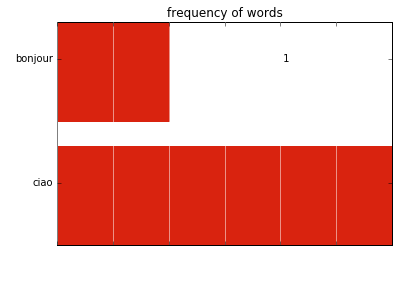

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# this is general purpose code to produce a barplot from a list like
# See Unit test below for an example use case

def myBarPlot(dimensionMeasureList, measureStr):
    """
    Show a bar chart of the total measure per item
    """
    items = [d[0] for d in dimensionMeasureList]
    minutes  = [d[1] for d in dimensionMeasureList]
    index    = list(xrange(len(items)))

    fig, axe = plt.subplots()
    bars = axe.barh(index, minutes)

    # Add the total measure (e.g., wordcount) to the right
    for idx, air, min in zip(index, items, minutes):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], items)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()


#  Unit test for myBarPlot
myBarPlot([(u'hallo', 5), (u'konnichiwa', 4), (u'ola', 3), (u'ciao', 3), (u'bonjour', 1)][3:] , 
          "frequency of words")

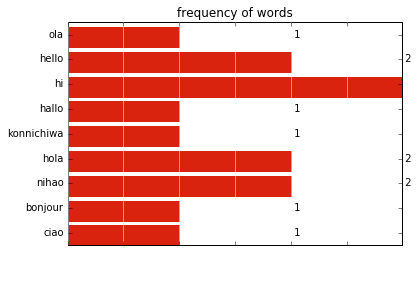

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# this is general purpose code to produce a barplot from a list like
# wordCounts = [(u'hallo', 1),
#  (u'konnichiwa', 1),
#  (u'ola', 1),
#  (u'ciao', 1),
#  (u'bonjour', 1),
#  (u'nihao', 2),
#  (u'hello', 2),
#  (u'hola', 2),
#  (u'hi', 3)]
#  to Call use 
#   plot(wordCounts[:10], "frequency of words")

def plot(delays, measureStr):
    """
    Show a bar chart of the total delay per airline
    """
    airlines = [d[0] for d in delays]
    measures  = [d[1] for d in delays]
    index    = list(xrange(len(airlines)))

    fig, axe = plt.subplots()
    bars = axe.barh(index, measures)

    # Add the total minutes to the right
    for idx, air, min in zip(index, airlines, measures):
        if min > 0:
            bars[idx].set_color('#d9230f')
            axe.annotate(" %0.0f" % min, xy=(min+1, idx+0.5), va='center')
        else:
            bars[idx].set_color('#469408')
            axe.annotate(" %0.0f" % min, xy=(10, idx+0.5), va='center')

    # Set the ticks
    ticks = plt.yticks([idx+ 0.5 for idx in index], airlines)
    xt = plt.xticks()[0]
    plt.xticks(xt, [' '] * len(xt))

    #minimize chartjunk
    plt.grid(axis = 'x', color ='white', linestyle='-')

    plt.title(measureStr)
    plt.show()


#  E.g., Call
plot(wordCounts[:10], "frequency of words")

(u'hi', 3)
(u'nihao', 2)
(u'hello', 2)
(u'hola', 2)
(u'hallo', 1)
(u'konnichiwa', 1)
(u'ola', 1)
(u'ciao', 1)
(u'bonjour', 1)


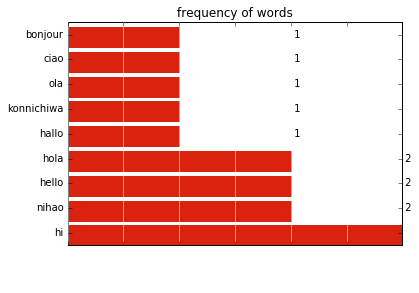

In [16]:
#modify the code to sort the word count records in decreasing order of frequency and plot

text_file = sc.textFile('wordcount.txt')
counts = text_file.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b, 1) \
    .sortBy(lambda x: x[1], ascending = False)
     
wordCounts = counts.collect()

for v in wordCounts:
    print v

myBarPlot(wordCounts[:10], "frequency of words")

### Quiz Compute the number of primes in the RDD

In [29]:
def isprime(n):
    """
    check if integer n is a prime
    """
    # make sure n is a positive integer
    n = abs(int(n))
    # 0 and 1 are not primes
    if n < 2:
        return False
    # 2 is the only even prime number
    if n == 2:
        return True
    # all other even numbers are not primes
    if not n & 1:
        return False
    # range starts with 3 and only needs to go up the square root of n
    # for all odd numbers
    for x in range(3, int(n**0.5)+1, 2):
        if n % x == 0:
            return False
    return True

# Create an RDD of numbers from 0 to 1,000,000

rdd1=sc.parallelize([0,10,35,3500, 5]).collect()
rdd1

# Compute the number of primes in the RDD
prime=sc.parallelize([0,10,35,3500, 5]).map(lambda x: isprime(x)).map(lambda x:(x,1)).reduceByKey(lambda a, b: a + b, 1)
prime.collect()

[(False, 4), (True, 1)]

### Analysis of web server logs with Spark

In [44]:
!head example.log 

2015-12-10T13:36:47|86.88.135.133|FR|SUCCESS
2015-12-10T13:36:47|25.53.251.132|FR|SUCCESS
2015-12-10T13:36:47|224.251.26.196|FR|SUCCESS
2015-12-10T13:36:47|72.96.92.96|FR|SUCCESS
2015-12-10T13:36:47|93.159.208.231|FR|SUCCESS
2015-12-10T13:36:47|200.85.209.180|FR|SUCCESS
2015-12-10T13:36:47|117.35.65.164|FR|SUCCESS
2015-12-10T13:36:47|164.86.143.136|FR|SUCCESS
2015-12-10T13:36:47|56.160.244.16|FR|SUCCESS
2015-12-10T13:36:47|205.111.122.245|FR|SUCCESS
